___
# Atividade: Duas variáveis quantitativas com Discriminação Salarial
___

## Aula 05


**Preparo Prévio:**
1. Leitura prévia necessária: Montgomery et al (5ª. Edição): Seção 2.6 (pág. 46) e Exemplo 6.1 (pág. 306).

**Hoje:**
1. Analisar, graficamente, a associação entre duas variáveis quantitativas.
2. Compreender a medida nomeada coeficiente de covariância, no que tange ao significado da fórmula e uso do valor resultante para descrever associação entre variáveis.
3. Avaliar vantagens e desvantagens do coeficiente de covariância e buscar alternativa que compense seu mau uso (coeficiente de correlação).
4. Interpretar, descritivamente, valores dos coeficientes linear e angular para qualquer problema prático.
5. Fechamento do conteúdo.


**Próxima aula:**
1. Estudo para PROJETO 1!

___

## <font color='blue'>Discriminação Salarial</font>

Uma empresa está sendo acusada de pagar um salário maior para os homens do que para as mulheres. 
Para justificar a acusação, apresentou-se uma lista de salários de uma amostra de funcionários. 
Essa empresa tem motivos para se preocupar?

A base de dados `Discriminação.xlsx` apresenta, para cada funcionário, as variáveis:
1. Sexo ('fem' ou 'masc');
2. Anos (anos no emprego; e 
3. Salario (salário mensal, em mil reais). 

Considerando esses dados, faça as seguintes tarefas:

1. Análise descritiva completa considerando as ferramentas estatísticas e computacionais vistas até o momento. Faça essa análise com olhar na preocupação da empresa.
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o DP\CD\CD1S17\Aula5


In [3]:
dados = pd.read_excel('Discriminação.xlsx')
dados.head()

,Sexo,Anos,Salario
0,fem,9,39
1,fem,6,36
2,fem,10,40
3,fem,0,24
4,fem,9,36


In [4]:
h = dados.Sexo == "masc"
m = dados.Sexo == "fem"

sh = dados.Salario[h]
sm = dados.Salario[m]

h_ano = dados.Anos[h]  
m_ano = dados.Anos[m] 

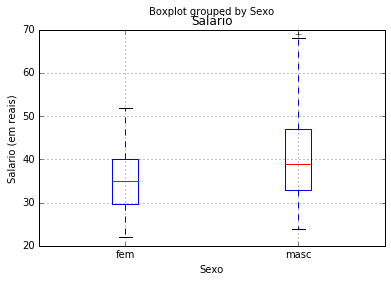

In [5]:
#dataframe.boxplot(column="quanti",  by="quali")
#plot = dados.iloc[x:y].plot(kind='box',title='') -para variaveis quanti
dados.boxplot(column='Salario', by="Sexo")
plt.ylabel("Salario (em reais)")
plt.xlabel("Sexo")

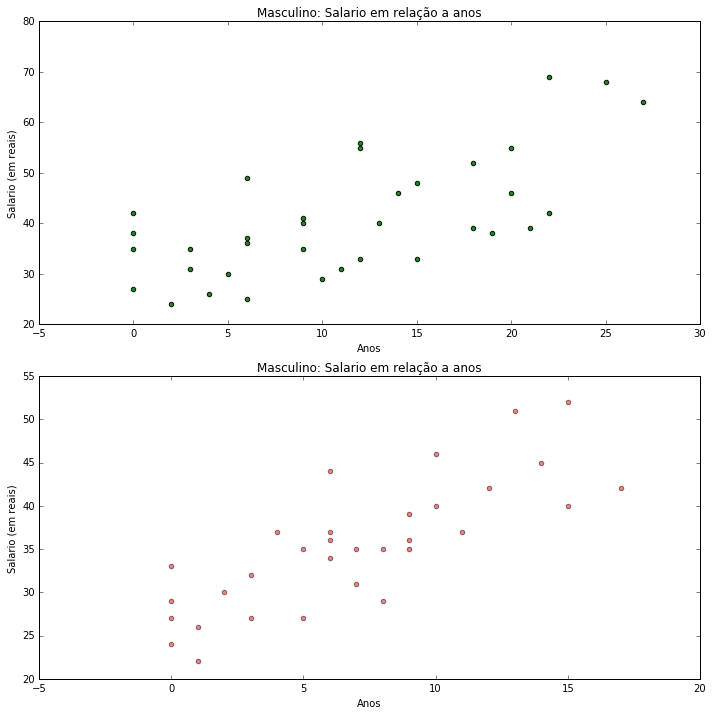

In [6]:
matriz = plt.figure(figsize=(10,10))

plt.subplot(211)
plt.scatter(dados.Anos[h], dados.Salario[h], c="g", alpha=0.9)
plt.title("Masculino: Salario em relação a anos")
plt.xlabel("Anos")
plt.ylabel("Salario (em reais)")

plt.subplot(212)
plt.scatter(dados.Anos[m], dados.Salario[m], c="r", alpha=0.5)
plt.title("Masculino: Salario em relação a anos")
plt.xlabel("Anos")
plt.ylabel("Salario (em reais)")

plt.tight_layout()
plt.show()

In [7]:
cov_h = sh.cov(h_ano)
cov_m = sm.cov(m_ano)

corr_h = sh.corr(h_ano)
corr_m = sm.corr(m_ano)

var_h = h_ano.var()
var_m = m_ano.var()


print("Covariancia homem e salario", cov_h)
print("Covariancia mulher e salario", cov_m)

print()
print("Correlação homem e salario", corr_h)
print("Correlação mulher e salario", corr_m)


Covariancia homem e salario 61.4781512605
Covariancia mulher e salario 28.9334677419

Correlação homem e salario 0.673998640177
Correlação mulher e salario 0.802238989823


In [8]:
#a = Cov(X,Y)/Var(X)
#b = ymedia - a*xmedia -> y = salario ; x = anos
#reta de tendencia -> y = a*x + b

ah = cov_h/var_h
bh = (sh.mean()) - (ah*h_ano.mean())

am = cov_m/var_m
bm = (sm.mean()) - (am*m_ano.mean())


print("Coeficiente linear dos homens:", bh)
print("Coeficiente angular dos homens:", ah)
print()
print("Coeficiente linear das mulheres:", bm)
print("Coeficiente angular das mulheres:", am)

Coeficiente linear dos homens: 29.51939817
Coeficiente angular dos homens: 1.0173123453

Coeficiente linear das mulheres: 26.9666097353
Coeficiente angular das mulheres: 1.22553373185


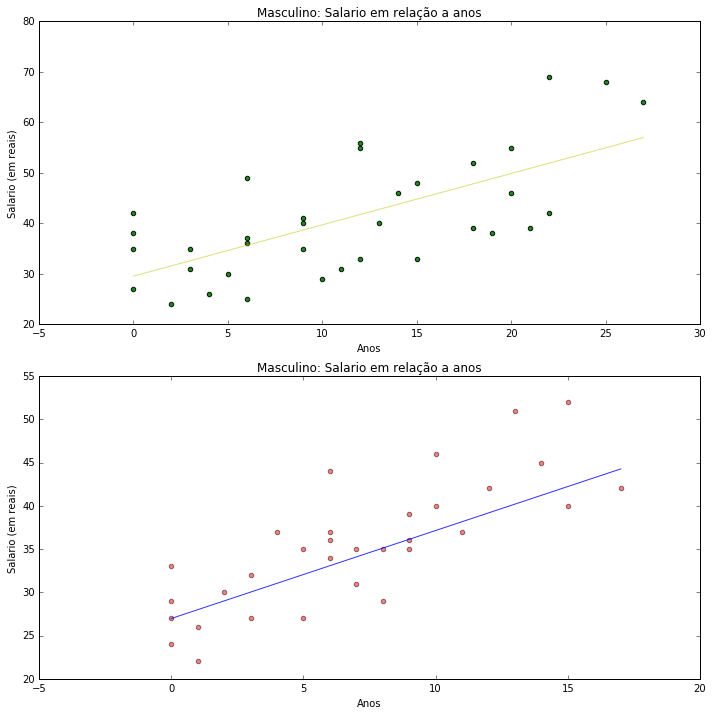

In [9]:
matriz = plt.figure(figsize=(10,10))

plt.subplot(211)
plt.scatter(dados.Anos[h], dados.Salario[h], c="g", alpha=0.9)
plt.title("Masculino: Salario em relação a anos")
plt.xlabel("Anos")
plt.ylabel("Salario (em reais)")
plt.plot((dados.Anos[h].min(), dados.Anos[h].max()), (ah*dados.Anos[h].min()+bh, ah*dados.Anos[h].max()+bh), color="y", alpha=0.5)

plt.subplot(212)
plt.scatter(dados.Anos[m], dados.Salario[m], c="r", alpha=0.5)
plt.title("Masculino: Salario em relação a anos")
plt.xlabel("Anos")
plt.ylabel("Salario (em reais)")
plt.plot((dados.Anos[m].min(), dados.Anos[m].max()), (am*dados.Anos[m].min()+bm, ah*dados.Anos[m].max()+bm), color="blue", alpha=0.8)

plt.tight_layout()
plt.show()